In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
from scipy.optimize import curve_fit

In [2]:
df = pd.read_csv('C:/Users/chenj/Desktop/AION/2023/Loading Rate/Repump/repump load-0002.csv',skiprows=[1])

In [3]:
df.iloc[:,1] = df.iloc[:,1]+30
df.iloc[:,0] = df.iloc[:,0]  * 1000

df = df[df.iloc[:,0]  >= 1050]

df = df[df.iloc[:,0]  <= 1600]
window_size = 500
y_new = np.convolve(df.iloc[:,1], np.ones(window_size)/window_size, mode='valid')
x = df.iloc[:,0][(window_size-1)//2:-(window_size-1)//2]

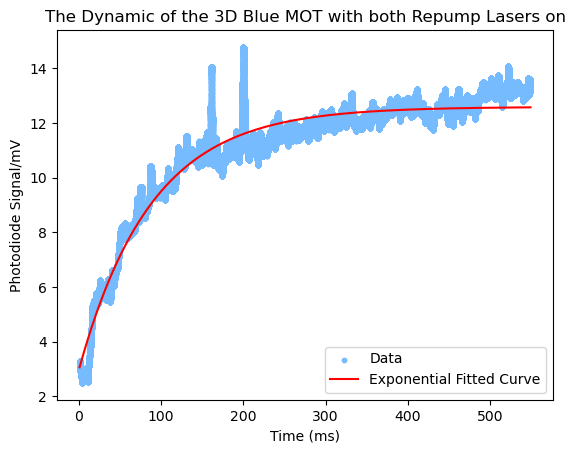

In [4]:
threshold = 1050

# Use boolean indexing to filter values
filtered_indices = x >= threshold
filtered_x = x[filtered_indices]-1050
filtered_y = y_new[filtered_indices]

def exponential_decay(x, a, b, c):
    return a * (1-np.exp(-b * x)) + c

p0=[1.31245103*10**7, 1.132006444*10**(-2), 3.95469870*10**6]

params, covariance = curve_fit(exponential_decay,filtered_x , filtered_y,p0, maxfev=8000)

a_opt, b_opt, c_opt = params

y_fit = exponential_decay(filtered_x, a_opt, b_opt, c_opt)

plt.scatter(filtered_x, filtered_y, s=10,color = "xkcd:sky blue",label='Data')

plt.plot(filtered_x, y_fit, label='Exponential Fitted Curve', color='red')

plt.xlabel('Time (ms)')
plt.ylabel("Photodiode Signal/mV")
plt.title('The Dynamic of the 3D Blue MOT with both Repump Lasers on')
plt.legend()

# Show the plot
plt.show()